In [3]:
%%capture
import lantern as l

In [50]:
import altair as alt
import numpy as np
import pandas as pd
from vega_datasets import data
df = l.line().reset_index().melt('index', var_name='cat', value_name='price')

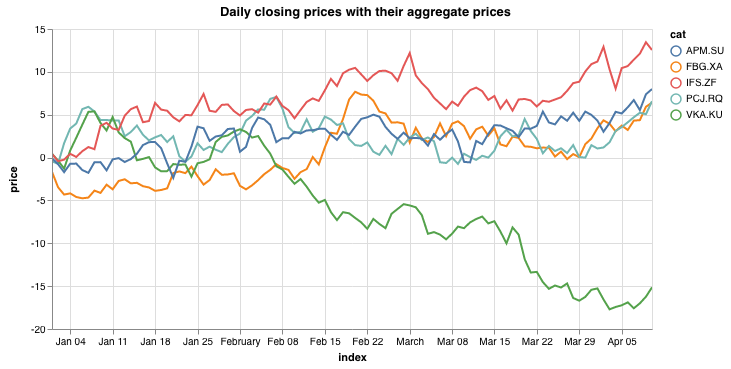

In [52]:
line = alt.Chart(df).mark_line().encode(
    x='index',
    y='price',
    color='cat'
).properties(
    width=600,
    title="Daily closing prices with their aggregate prices"
).interactive(bind_y=False)

line

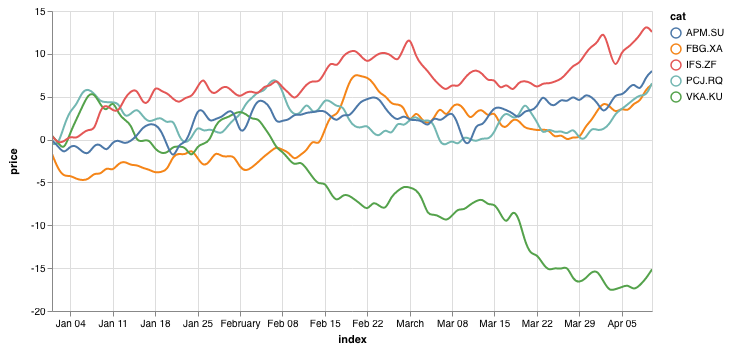

In [61]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['index'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='index',
    y='price',
    color='cat'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='index',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'price', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='index',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=df, width=600, height=300).interactive(bind_y=False)